In [51]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('https://raw.githubusercontent.com/onesinus/ds-ml-dl-ai/main/KDDTest-21.txt', header=None)

In [52]:
columns = ([
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate' ,
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'class', 'level'
])
df.columns = columns

In [53]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,13,tcp,telnet,SF,118,2425,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.0,26,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17


## Exploratory data analysis (EDA) 

We will use EDA to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11850 non-null  int64  
 1   protocol_type                11850 non-null  object 
 2   service                      11850 non-null  object 
 3   flag                         11850 non-null  object 
 4   src_bytes                    11850 non-null  int64  
 5   dst_bytes                    11850 non-null  int64  
 6   land                         11850 non-null  int64  
 7   wrong_fragment               11850 non-null  int64  
 8   urgent                       11850 non-null  int64  
 9   hot                          11850 non-null  int64  
 10  num_failed_logins            11850 non-null  int64  
 11  logged_in                    11850 non-null  int64  
 12  num_compromised              11850 non-null  int64  
 13  root_shell      

From our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing.
> * Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 15, 24, and 4 contain numeric values (of types float64, int64 and objects respectively) and all the other features contain non-numeric values.


In [55]:
# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())

0


Finally, the dataset has no missing values.

In [56]:
# Print DataFrame information
df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,11850.000000,1.185000e+04,1.185000e+04,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.0,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000
mean,415.439831,1.945644e+04,1.228105e+03,0.000591,0.016034,0.001350,0.190211,0.041181,0.253080,0.227679,0.004304,0.000506,0.218059,0.016203,0.002194,0.003882,0.0,0.000928,0.052911,94.116118,48.269451,0.113841,0.114590,0.274313,0.268355,0.753008,0.157149,0.096762,213.945401,117.541603,0.539597,0.148986,0.206493,0.024465,0.104181,0.106697,0.263952,0.252209,15.326835
std,1919.441623,6.519865e+05,2.389603e+04,0.024299,0.196379,0.050299,1.222392,0.205401,0.434795,10.025774,0.065465,0.029046,11.090938,0.933202,0.066210,0.076763,0.0,0.030455,0.223866,153.418960,119.213908,0.305945,0.309216,0.430353,0.430249,0.399044,0.338761,0.278665,82.203728,106.563438,0.423370,0.288758,0.379193,0.114234,0.265086,0.278549,0.377337,0.403039,4.407479
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,255.000000,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,17.000000
75%,1.000000,1.600000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,132.000000,16.000000,0.000000,0.000000,0.840000,0.797500,1.000000,0.060000,0.000000,255.000000,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000,18.000000
max,57715.000000,6.282565e+07,1.288652e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 101 - 1000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.

In [57]:
data = df.copy()

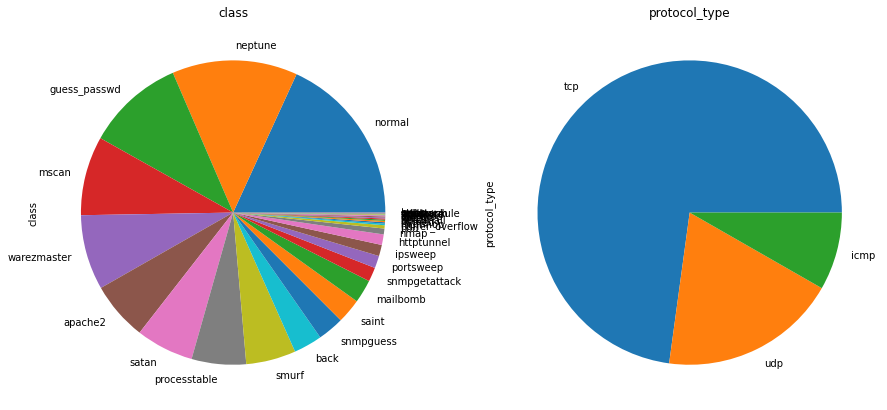

In [58]:
def pie_plot(data, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10)
        ax.set_title(str(col), fontsize=12)
        
pie_plot(data, ['class', 'protocol_type', 'flag'], 1, 2)  

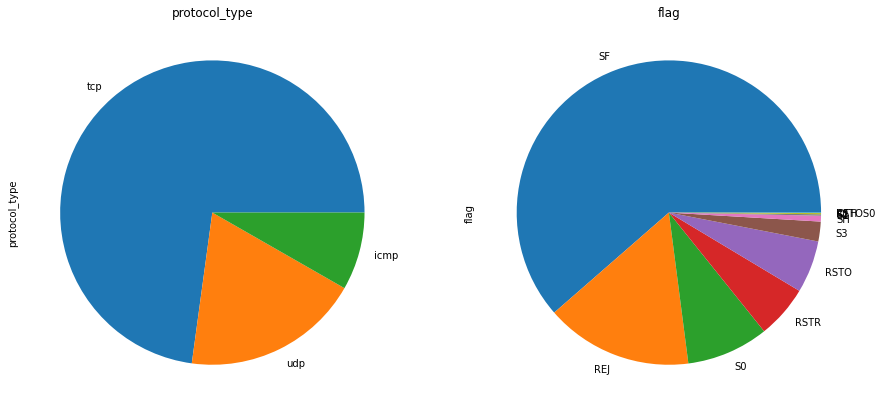

In [59]:
pie_plot(data, ['protocol_type', 'flag'], 1, 2)

# Outlier Analysis Check

The outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. 
These are a few of the most popular visualization methods for finding outliers in data:

> * **Histogram**
> * **Box plot**
> * **Scatter plot**

We creat a box plots for various feature columns. A box plot allows us to identify the univariate outliers, or outliers for one variable. Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data. In the chart, the outliers are shown as points which makes them easy to see.

## Using Box Histogram for Outlier Detection

In [60]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

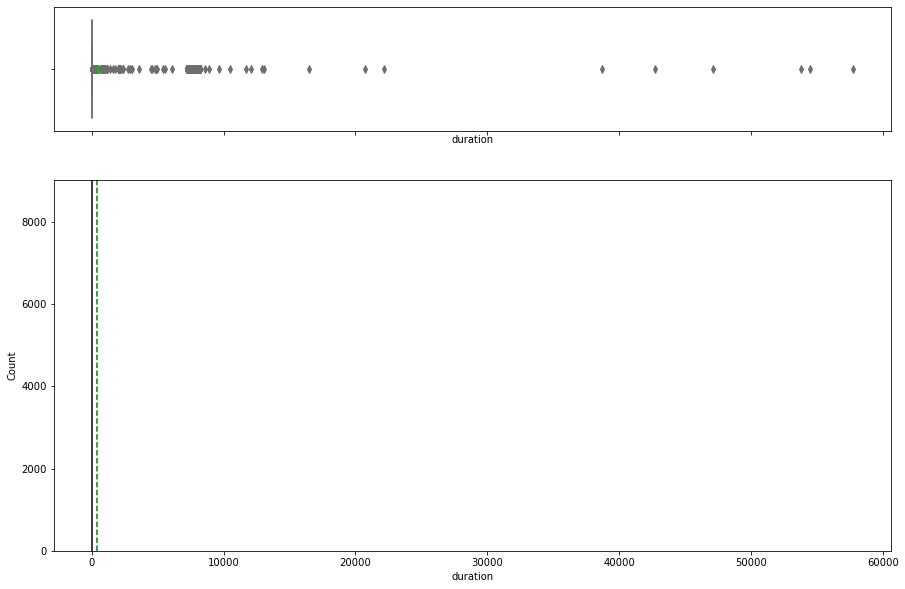

In [61]:
histogram_boxplot(data, "duration")

### Using Box Plots for Outlier Detection

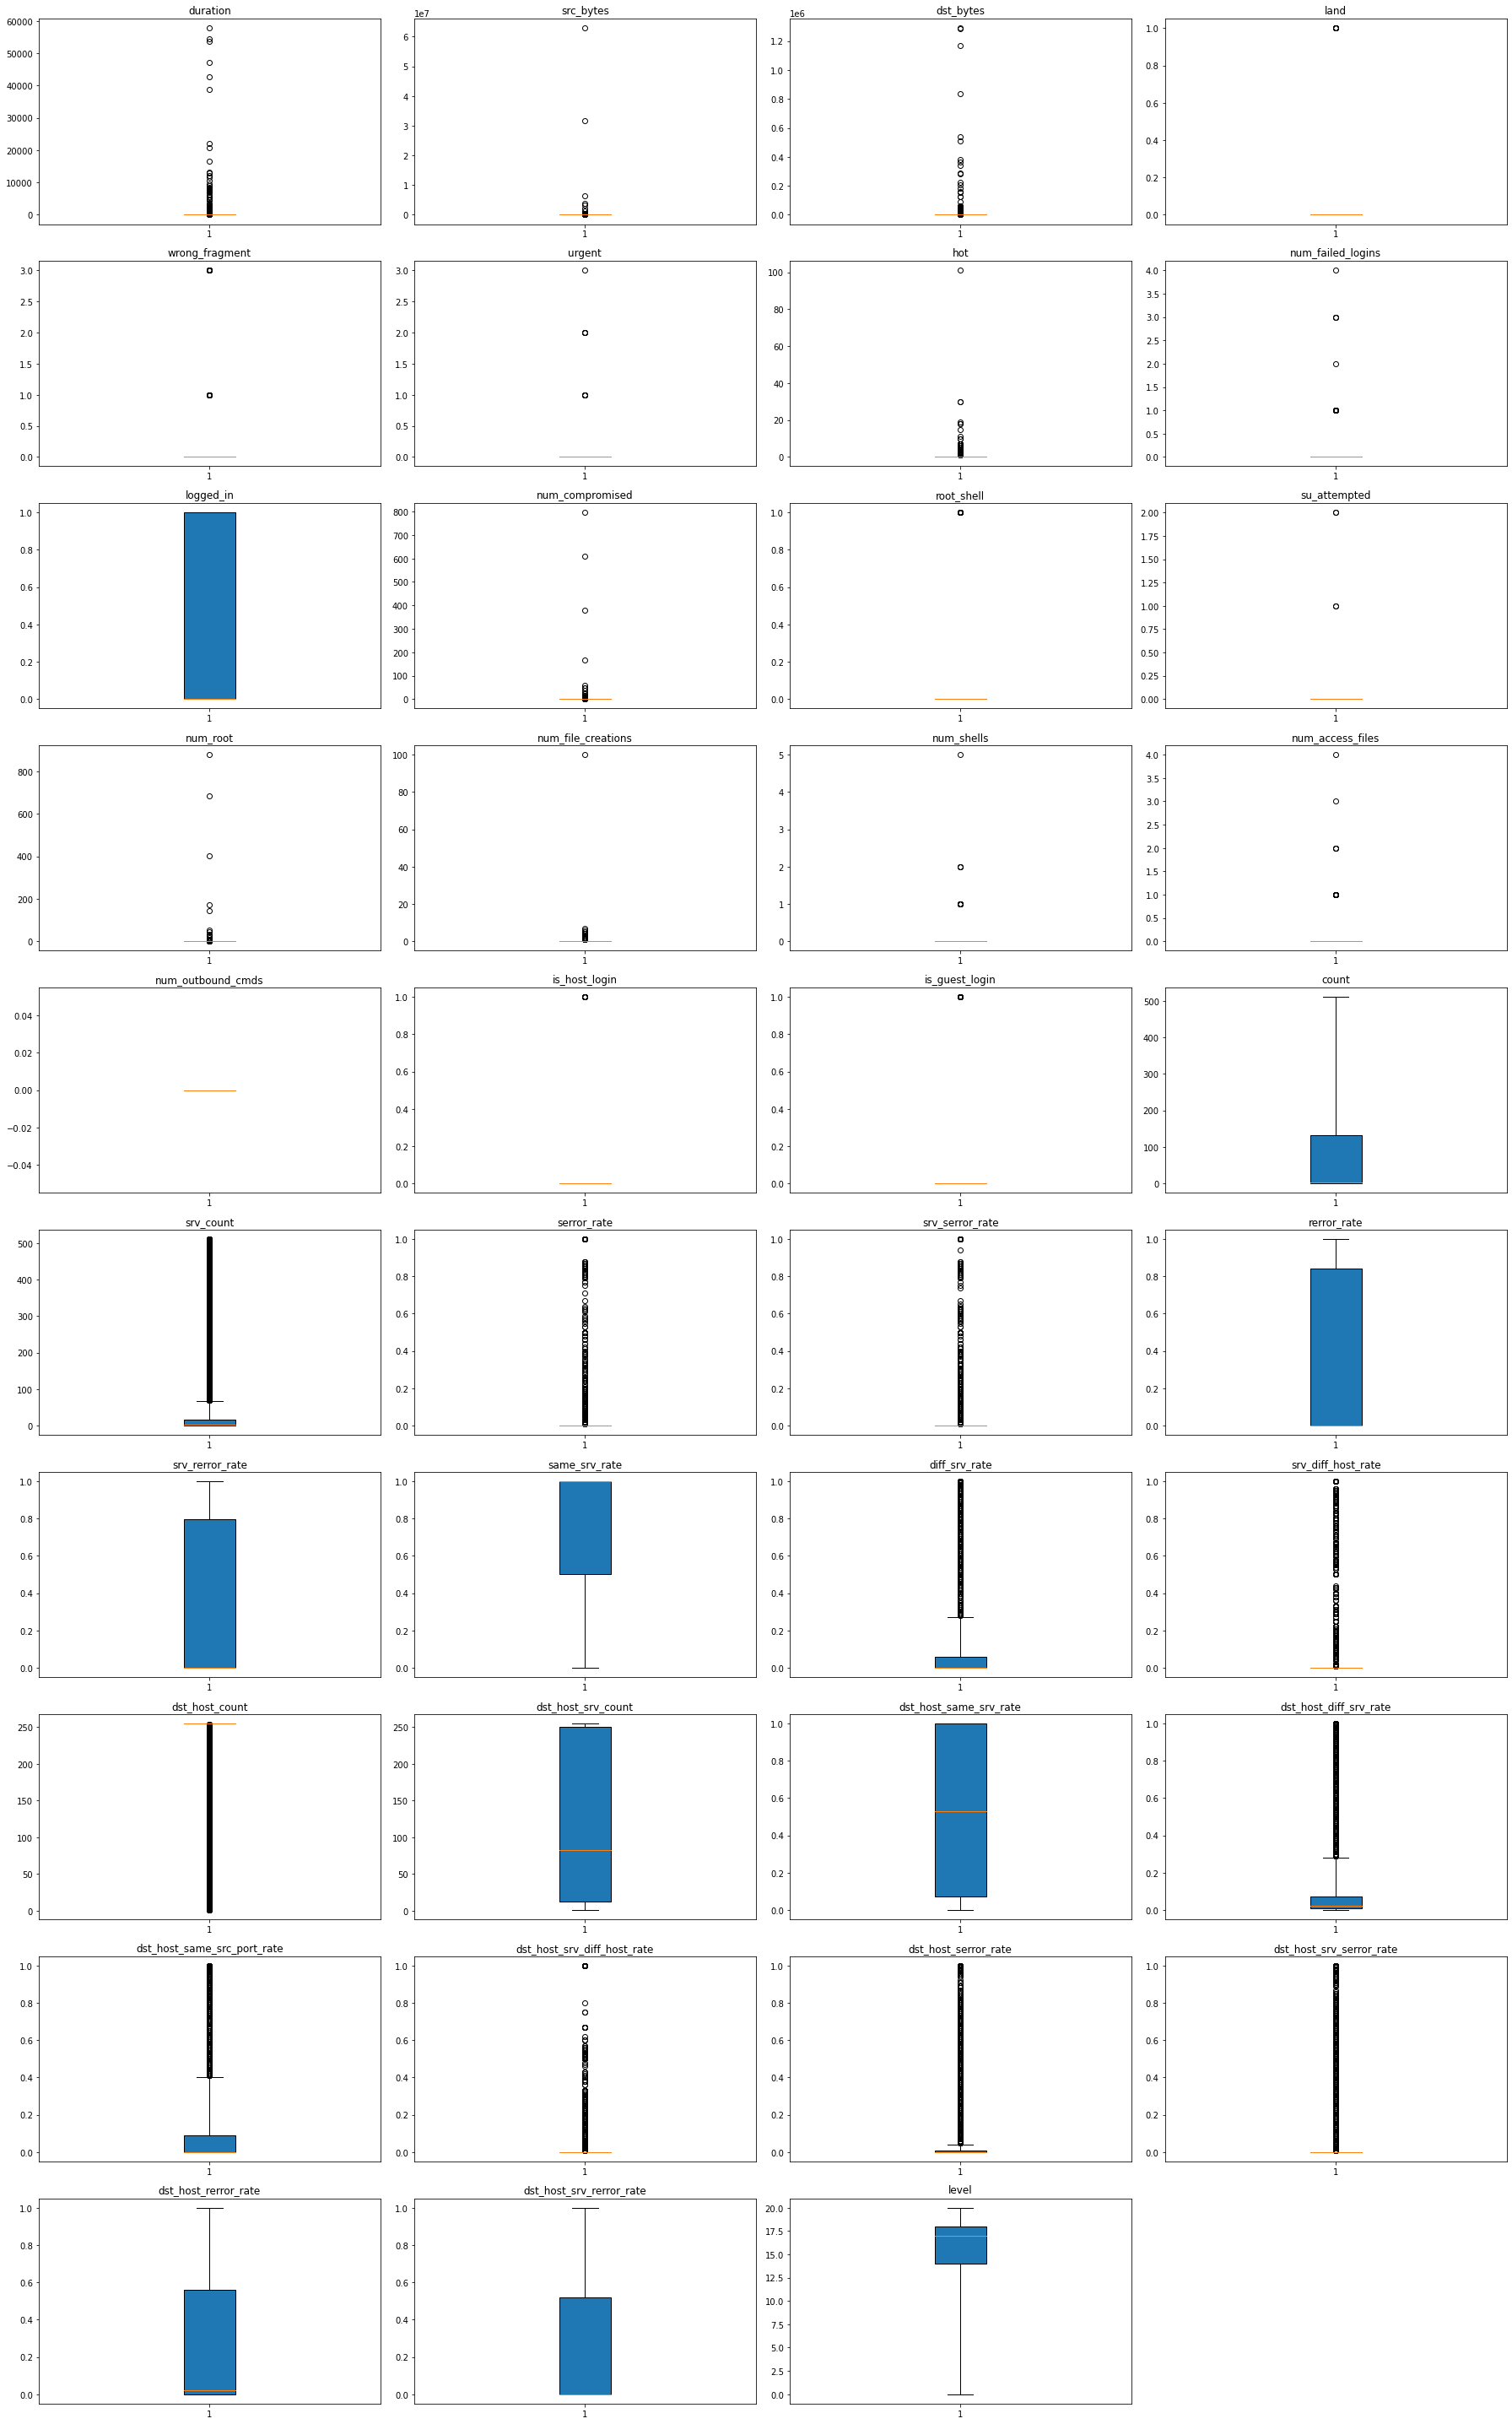

In [62]:
plt.figure(figsize=(25, 40))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 4, i + 1)
    plt.boxplot(data[variable], patch_artist=True, whis=3.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**The dots in the box plots correspond to extreme outlier values.**

In [63]:
 clean_data = data.drop([
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in','root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login','is_guest_login'],axis=1)

In [64]:
clean_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,num_compromised,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,13,tcp,telnet,SF,118,2425,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.0,26,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd,2
1,0,udp,private,SF,44,0,0,4,3,0.0,0.0,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
3,0,udp,private,SF,53,55,0,511,511,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
4,0,tcp,private,SH,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17


## Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. The benefits of performing feature selection before modeling your data are:

> **Avoid Overfitting:** Less redundant data gives performance boost to the model and results in less opportunity to make decisions based on noise

> **Improves Accuracy:** Less misleading data means modeling accuracy improves

> **Reduces Training Time:** Less data means that algorithms train faster

### 1.Filter methods

- chi-Square test
- Using Pearsons coorelation matrix

### Chi-Square Test

In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset. The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.

Chi2 test can be used to know the feature importance of categorical variables in classification problems.Basically it will find wheather a relationship exist or there is dependency between two features. Let us take some categorical variables and see how it performs

**1. Design the hypothesis**
> **Null hypothesis (H0) :** Two features are independent

> **Alternate hypothesis (H1):** Two features are not independent

> If we proved that input and target variables are independent, then there is no strong relation with the target and we can remove that feature on moving forward.

**2. Choose a alpha value**
> We need to choose a alpha-value (significance value) which indicates how confident are we in saying two features are independent.Here we choose alpha value = 0.05 which indicates the probability of rejecting null hypothesis if it is true.

> If the p value obtained is greater than alpha value the null hypotheis (H0) is true.

In [65]:
from sklearn.feature_selection import chi2,  SelectKBest 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [66]:
enc.fit(data[['protocol_type', 'service', 'flag', 'class']])

OrdinalEncoder()

In [67]:
data[['protocol_type', 'service', 'flag', 'class']] = enc.transform(data[['protocol_type', 'service', 'flag', 'class']])


In [68]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,13,1.0,53.0,9.0,118,2425,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.0,26,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,4.0,2
1,0,2.0,44.0,9.0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,29.0,12
2,0,1.0,53.0,8.0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,21.0,18
3,0,2.0,44.0,9.0,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,16.0,17
4,0,1.0,44.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,15.0,17


In [69]:
data_chi = data.copy()
X_c = data_chi.drop(["class"], axis=1) ##  to drop class status from the data
y_c = data_chi["class"]

### Selecting Features With high chi-square

We have used SelectKBest to select the features with best chi-square, we have passed two parameters one is the scoring metric that is chi2 and other is the value of K which signifies the number of features we want in final dataset. We have used fit_transform to fit and transfrom the current dataset into the desired dataset. Finally we have printed the final dataset and the shape of initial and final dataset.

In [70]:
chi2_selector = SelectKBest(chi2, k=4)
X_kbest = chi2_selector.fit_transform(X_c, y_c)
print(X_kbest)

print('Original number of features:', X_c.shape)
print('Reduced number of features:', X_kbest.shape)

[[1.300e+01 1.180e+02 2.425e+03 1.000e+00]
 [0.000e+00 4.400e+01 0.000e+00 3.000e+00]
 [0.000e+00 0.000e+00 4.400e+01 1.000e+00]
 ...
 [1.000e+00 0.000e+00 1.500e+01 7.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 5.000e+00]
 [0.000e+00 4.100e+01 0.000e+00 4.000e+00]]
Original number of features: (11850, 42)
Reduced number of features: (11850, 4)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.3, random_state=123)
f_score = chi2(X_train, y_train)
pvalues = pd.Series(f_score[1])
f_score

(array([2.93569856e+07, 1.37320040e+03, 2.95697835e+04, 9.18709440e+03,
        4.96445885e+10, 7.40580328e+07, 8.29000000e+03, 3.97180548e+03,
        6.89650000e+03, 9.36342296e+03, 2.94817485e+03, 3.02701438e+03,
        3.04332105e+04, 3.46756477e+03, 2.25398406e+01, 3.75241313e+04,
        1.23063719e+04, 6.13093065e+03, 2.04224114e+03,            nan,
        1.30915682e+03, 3.02145540e+03, 1.02354762e+06, 1.11059800e+06,
        1.82250466e+03, 1.81491268e+03, 3.06163457e+03, 3.08218380e+03,
        1.40364552e+03, 3.71422992e+03, 4.08362443e+03, 1.00396826e+05,
        5.20406010e+05, 1.70097136e+03, 2.93772975e+03, 2.89037838e+03,
        3.26073445e+03, 1.68867481e+03, 2.01175723e+03, 1.95819006e+03,
        2.96181924e+03, 5.03491276e+03]),
 array([0.00000000e+000, 1.95500265e-264, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.

In [72]:
pvalues.index = X_train.columns
pvalues.sort_values(ascending=False)

su_attempted                    9.705447e-01
is_host_login                  6.848548e-251
protocol_type                  1.955003e-264
same_srv_rate                  7.022467e-271
level                           0.000000e+00
logged_in                       0.000000e+00
num_shells                      0.000000e+00
num_file_creations              0.000000e+00
num_root                        0.000000e+00
root_shell                      0.000000e+00
num_compromised                 0.000000e+00
hot                             0.000000e+00
num_failed_logins               0.000000e+00
urgent                          0.000000e+00
wrong_fragment                  0.000000e+00
land                            0.000000e+00
dst_bytes                       0.000000e+00
src_bytes                       0.000000e+00
flag                            0.000000e+00
service                         0.000000e+00
num_access_files                0.000000e+00
is_guest_login                  0.000000e+00
dst_host_s

Again, from this result, we can see features that have chi-square statistic is 0. We can also see that the p-value is  statistically significant where (p < .05). So, we would say that there is not a significant difference in the distribution of features su_attempt, num_outbound_cmds and is_host_login. In other words, The smaller the p_value the more predictive the feature is.


In [73]:
from scipy.stats import chi2_contingency
# To rank all features
chi_ls = []
for feature in X_train.columns:
     # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
     # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

    

Text(0.5, 1.0, 'Feature importance based on chi-square test')

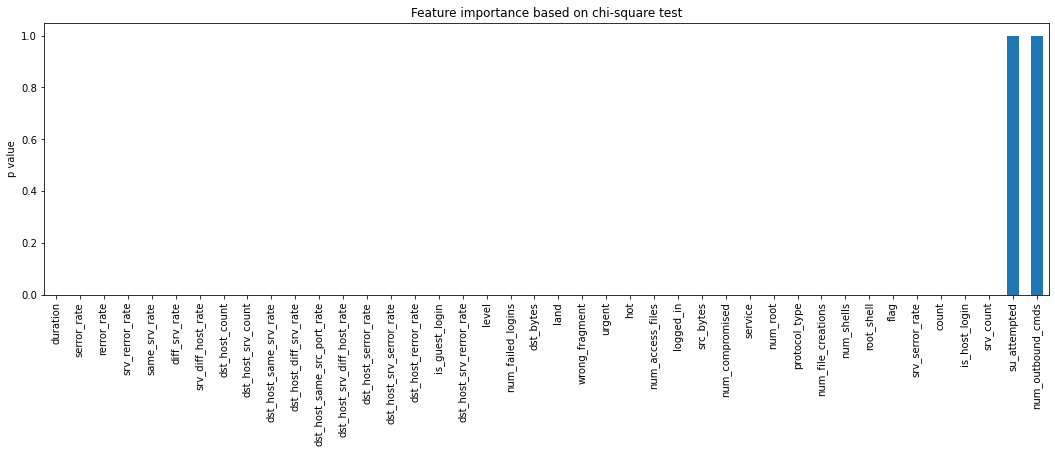

In [74]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(figsize=(18, 5),rot=90)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

## Correlation Matrix plots

If you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.
* **Each cell in the matrix displays a correlation coefficient, ranging from -1 to 1, representing the strength and direction of the relationship between two variables. Correlation matrices help in understanding how variables are related to each other, enabling data analysts to identify relationships, dependencies, and potential causal links.**

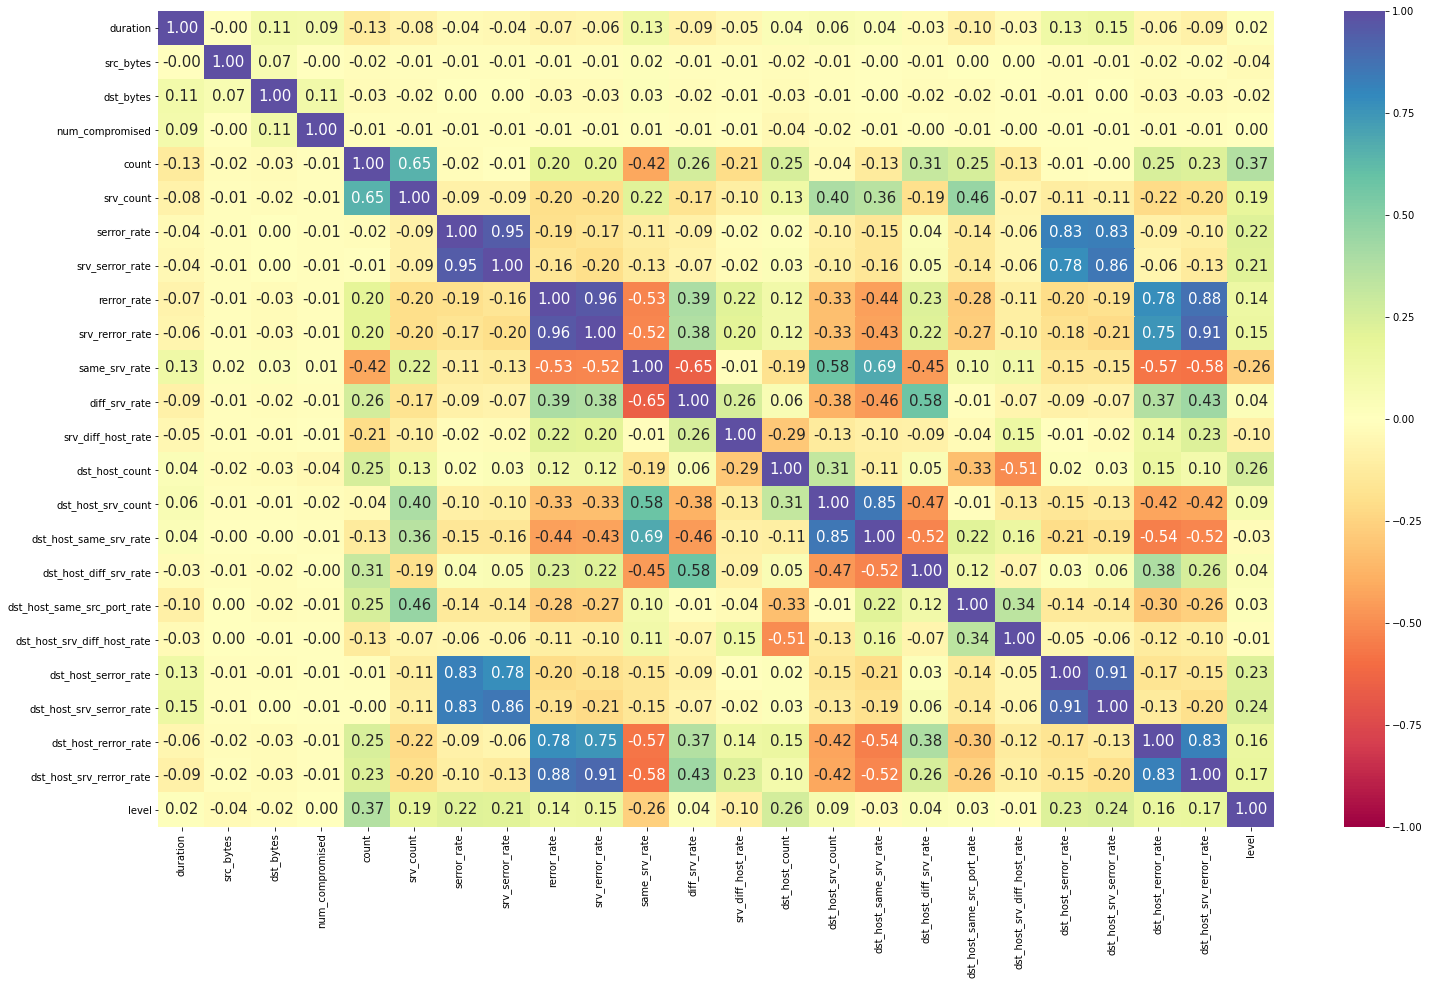

In [75]:
cols_list = clean_data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(25, 15))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", annot_kws={"size": 15}
)
plt.show()

* **Purple, Light Purple, Light Green means positive, red means negative. The stronger the color, the larger the correlation magnitude.**

## Data Preparataion for model building

To prepare label data for our model, we use label encoding. Label encoding converts categorical variables into numerical ones, making them suitable for machine learning models that require numerical input.

In [78]:
print('Label distribution dataset:')
print(df['class'].value_counts())

Label distribution dataset:
normal             2152
neptune            1579
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               727
processtable        685
smurf               627
back                359
snmpguess           331
saint               309
mailbomb            293
snmpgetattack       178
portsweep           156
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
sqlattack             2
loadmodule            2
worm                  2
phf                   2
perl                  2
udpstorm              2
imap                  1
Name: class, dtype: int64


In [24]:
X = clean_data.drop(['class'],axis=1)
y = clean_data['class'].apply(lambda x: 0 if x =='normal' else 1)
x = pd.get_dummies(X, drop_first=True)

In [25]:
# Splitting data into training and test set:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)
print(x_train.shape, x_test.shape)

(8295, 97) (3555, 97)


In [26]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [27]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Model Building


### Random Forest

In [28]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

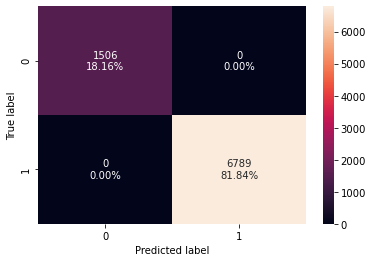

In [29]:
confusion_matrix_sklearn(rf,x_train,y_train)

In [30]:
rf_model_train_perf = model_performance_classification_sklearn(rf, x_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


### Tuning Models Using GridSearch for Hyperparameter tuning model

In [31]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=5,
                       n_estimators=110, random_state=1)

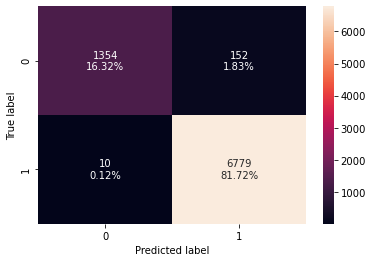

In [32]:

confusion_matrix_sklearn(rf_estimator, x_train,y_train)

In [33]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
level                        1.331975e-01
dst_bytes                    9.611205e-02
src_bytes                    7.993744e-02
srv_count                    7.804826e-02
protocol_type_udp            6.664414e-02
count                        4.971851e-02
dst_host_srv_count           4.089458e-02
service_domain_u             3.954516e-02
protocol_type_tcp            3.855361e-02
dst_host_same_srv_rate       3.810403e-02
dst_host_same_src_port_rate  3.557135e-02
dst_host_diff_srv_rate       2.540847e-02
duration                     2.486603e-02
dst_host_rerror_rate         2.384755e-02
dst_host_srv_rerror_rate     2.089919e-02
service_ecr_i                1.903196e-02
flag_SF                      1.702312e-02
dst_host_count               1.632551e-02
service_private              1.292873e-02
same_srv_rate                1.067037e-02
dst_host_serror_rate         1.057811e-02
service_http                 9.972664e-03
diff_srv_rate                9.763

In [34]:
feature_names = x_train.columns

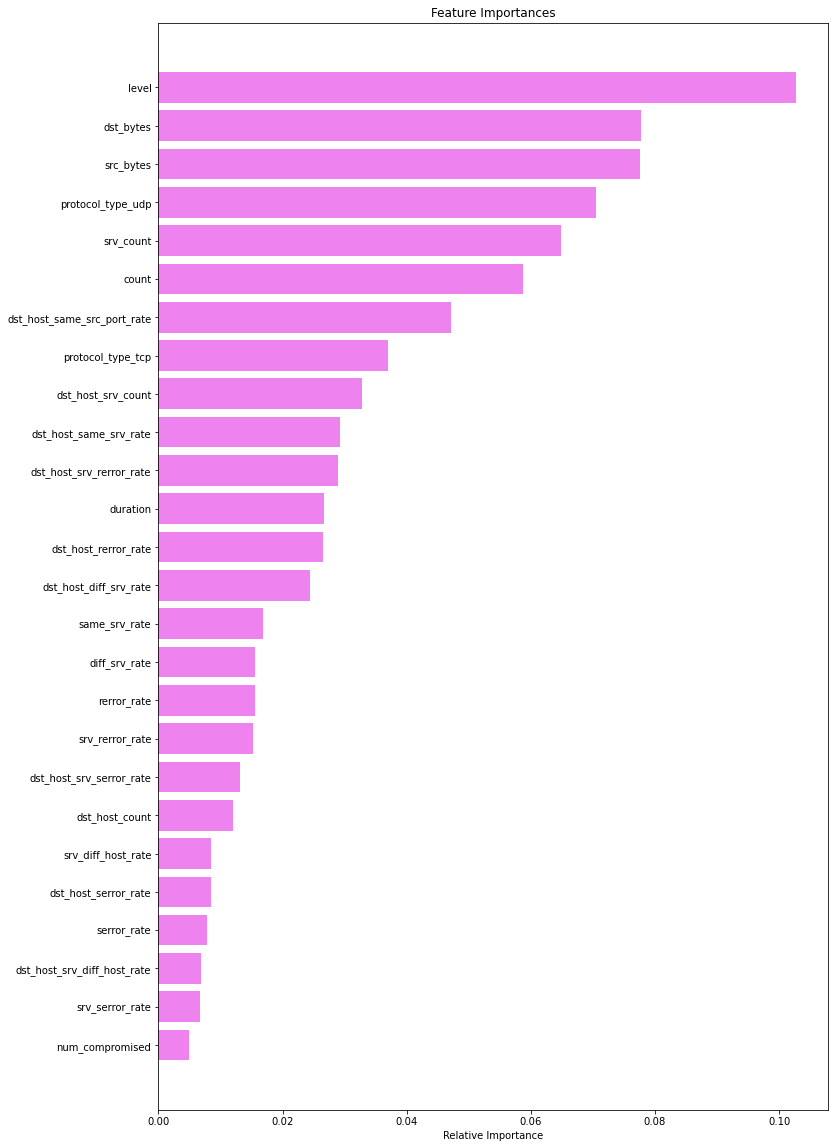

In [35]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances[:26])

plt.figure(figsize=(12,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
from sklearn.preprocessing import RobustScaler
dropped_columns = [
    'is_host_login', 'protocol_type', 'service', 'flag', 'land', 'logged_in',
    'is_guest_login', 'level', 'class'
]

def Scaling(data, columns):
  scaler = RobustScaler()
  scaler_fit_transform = scaler.fit_transform(data)

  return pd.DataFrame(scaler_fit_transform, columns=columns)

def preprocess(data):
  preprocess_df = data.drop(dropped_columns, axis=1)
  preprocess_columns = preprocess_df.columns

  scaled_df = Scaling(preprocess_df, preprocess_columns)

  data.drop(labels=preprocess_columns, axis="columns", inplace=True)
  data[preprocess_columns] = scaled_df[preprocess_columns]

  data.loc[data['class'] == "normal", "class"] = 0
  data.loc[data['class'] != 0, "class"] = 1

  data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])

  return data

In [37]:
scaled_data = preprocess(df)
print(scaled_data)

       land  logged_in  is_host_login  is_guest_login class  level  duration  \
0         0          1              0               0     1      2      13.0   
1         0          0              0               0     1     12       0.0   
2         0          0              0               0     1     18       0.0   
3         0          0              0               0     0     17       0.0   
4         0          0              0               0     1     17       0.0   
...     ...        ...            ...             ...   ...    ...       ...   
11845     0          0              0               0     0     18       0.0   
11846     0          1              0               0     0     18       0.0   
11847     0          0              0               0     1     13       1.0   
11848     0          0              0               0     1     15       0.0   
11849     0          0              0               0     1     17       0.0   

       src_bytes  dst_bytes  wrong_frag

In [38]:
x = scaled_data.drop(['class', 'level'], axis=1).values
y = df['class'].values
y_reg = df['level'].values

In [39]:
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components).fit(x)
x_reduced = pca.transform(x)
print(x_reduced)

print(f"The original features before PCA {x.shape[1]}")
print(f"Reduced features after PCA {x_reduced.shape[1]}")

[[-1.20660679e+02 -4.02596257e+02  2.11678617e+01 ... -1.58951061e-01
  -6.40857958e-02 -2.64353158e-01]
 [-1.21332033e+02 -4.15538555e+02 -7.15397392e+00 ...  1.60645593e-01
   1.11888104e-01  9.01087340e-02]
 [-1.21606553e+02 -4.15492580e+02 -6.73766685e+00 ...  5.10491347e-01
   1.11312033e+00 -3.82143902e-01]
 ...
 [-1.21572450e+02 -4.14672550e+02 -6.18769621e+00 ...  4.48557534e-01
   3.80436262e-01  1.86078824e-02]
 [-1.21570212e+02 -4.15698836e+02 -6.25986629e+00 ...  4.87461616e-02
   1.05464651e-01  3.12232222e-01]
 [-1.21350625e+02 -4.15536221e+02 -7.15221305e+00 ...  1.76124716e-01
  -4.29516144e-02  1.51984622e-01]]
The original features before PCA 114
Reduced features after PCA 20


In [40]:
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_test.shape)

x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_reduced,y,test_size=0.2,random_state=42)

print(x_test.shape)

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x,y_reg,test_size=0.2,random_state=42)

(2370, 114)
(2370, 114)


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
  confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
algorithms = {}
def algorithms_executor(model, name, x_train, x_test, y_train, y_test):
  train_actual = y_train
  train_predicted = model.predict(x_train)

  test_actual = y_test
  test_predicted = model.predict(x_test)

  train_accuracy = accuracy_score(train_actual, train_predicted)
  test_accuracy = accuracy_score(test_actual, test_predicted)

  train_precision = precision_score(train_actual, train_predicted, pos_label=0)
  test_precision = precision_score(test_actual, test_predicted, pos_label=0)

  train_recall = recall_score(train_actual, train_predicted, pos_label=0)
  test_recall = recall_score(test_actual, test_predicted, pos_label=0)

  train_f1 = f1_score(train_actual, train_predicted, pos_label=0)
  test_f1 = f1_score(test_actual, test_predicted, pos_label=0)

  algorithms[name] = [train_accuracy, test_accuracy, train_precision, test_precision, train_f1, test_f1]

  print(f"Training Accuracy {name} {train_accuracy*100:.2f} Test Accuracy {name} {test_accuracy*100:.2f}")
  print(f"Training Precision {name} {train_precision*100:.2f} Test Precision {name} {test_precision*100:.2f}")
  print(f"Training Recall {name} {train_recall*100:.2f} Test Recall {name} {test_recall*100:.2f}")
  print(f"Training F1 {name} {train_f1*100:.2f} Test F1 {name} {test_f1*100:.2f}")

  cm = confusion_matrix(test_actual, test_predicted)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])

  fig, ax = plt.subplots(figsize=(10,10))
  ax.grid(False)
  cm_display.plot(ax=ax)

In [42]:
def f_importances(model_name, coef, names, top=-1):
  imp = coef
  imp, names = zip(*sorted(list(zip(imp, names))))

  if top == -1:
    top = len(names)

  plt.figure(figsize=(10,10))
  plt.barh(range(top), imp[::-1][0:top], align='center')
  plt.yticks(range(top), names[::-1][0:top])
  plt.title(f"Feature importances for model {model_name}")
  plt.show()

Training Accuracy Logistic Regression 86.28 Test Accuracy Logistic Regression 85.78
Training Precision Logistic Regression 69.46 Test Precision Logistic Regression 70.11
Training Recall Logistic Regression 42.69 Test Recall Logistic Regression 41.40
Training F1 Logistic Regression 52.88 Test F1 Logistic Regression 52.06


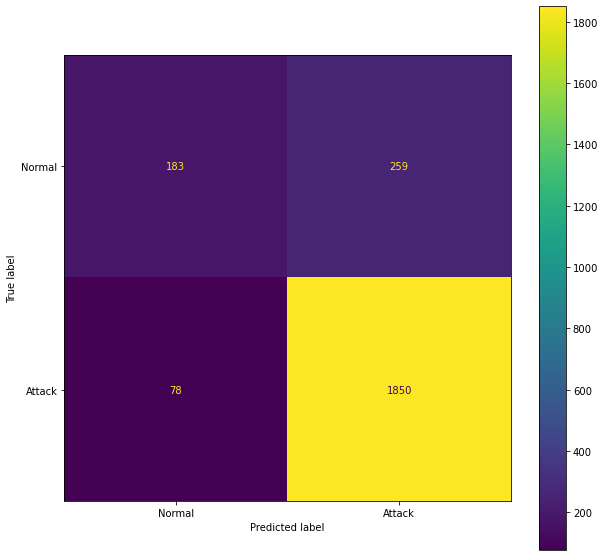

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)
name = "Logistic Regression"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

Training Accuracy RF 99.63 Test Accuracy RF 97.72
Training Precision RF 98.78 Test Precision RF 94.29
Training Recall RF 99.18 Test Recall RF 93.44
Training F1 RF 98.98 Test F1 RF 93.86


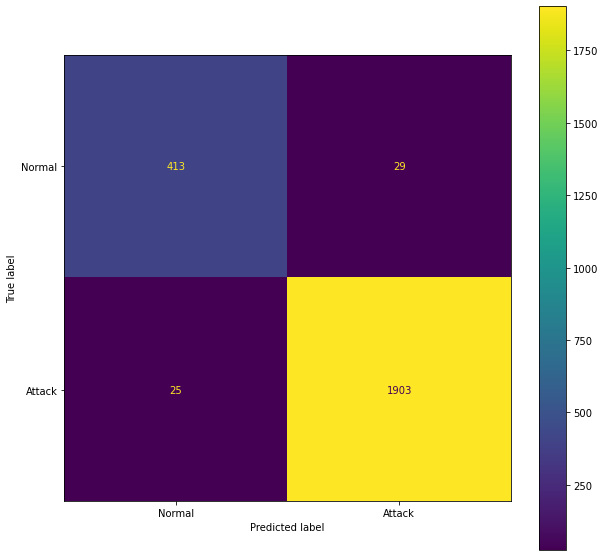

In [44]:
model = RandomForestClassifier().fit(x_train, y_train)
name = "RF"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

      protocol_type   service  flag  land  logged_in  is_host_login  \
0               tcp    telnet    SF     0          1              0   
1               udp   private    SF     0          0              0   
2               tcp    telnet    S3     0          0              0   
3               udp   private    SF     0          0              0   
4               tcp   private    SH     0          0              0   
...             ...       ...   ...   ...        ...            ...   
11845           udp  domain_u    SF     0          0              0   
11846           tcp      http    SF     0          1              0   
11847           tcp    telnet  RSTO     0          0              0   
11848           tcp    sunrpc   REJ     0          0              0   
11849           udp   private    SF     0          0              0   

       is_guest_login  duration  src_bytes  dst_bytes  wrong_fragment  urgent  \
0                   0      13.0    0.56250  26.075269             

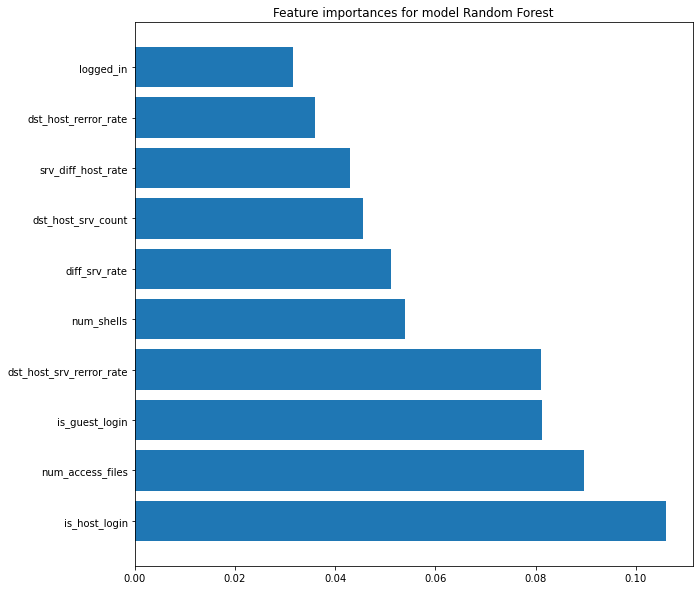

In [45]:
feature_names = df.drop(['class', 'level'], axis=1)
print(feature_names)
f_importances("Random Forest", abs(model.feature_importances_), feature_names, top=10)

## XGB Regressor

In [46]:
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 20).fit(x_train_reg, y_train_reg)

name = "XGBoost Regressor"
train_error = mean_squared_error(y_train_reg, xg_regressor.predict(x_train_reg))
print(train_error)

test_error = mean_squared_error(y_test_reg, xg_regressor.predict(x_test_reg))
print(test_error)

3.5701964212868624
4.861694624131384


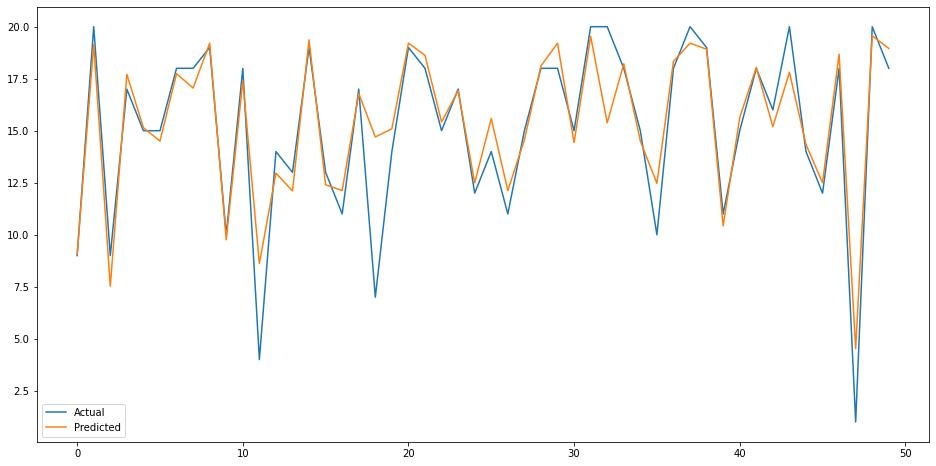

In [47]:
y_pred = xg_regressor.predict(x_test_reg)
data = pd.DataFrame({"Y_test": y_test_reg, "Y_test_prediction": y_pred})
plt.figure(figsize=(16,8))
plt.plot(data[:50])
plt.legend(['Actual', 'Predicted'])